In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

import graph_tool.all as gt
import sys
sys.path.append('/Users/glover.co/Documents/laszlo/NetDesign/scripts')
import assembly_tree as at
sys.path.append('/Users/glover.co/Documents/laszlo/NetDesign/scripts')
import mcmc
import treelib
from itertools import product
import time
import os

In [7]:
protein_human_path = '/Users/glover.co/Documents/laszlo/NetDesign/data/protein_complex/proteins/human'
edgefiles = sorted(os.listdir(protein_human_path+'/edgefiles'))
treefiles = sorted(os.listdir(protein_human_path+'/treefiles'))
Xfiles = sorted(os.listdir(protein_human_path+'/Xfiles'))


In [152]:
graphs_list = {}
for i,graph in enumerate(edgefiles):
    basename = graph.split('.')[0]
    graphs_list[basename] = {}
    graphs_list[basename]['graph'] = nx.read_edgelist(protein_human_path+'/edgefiles/'+graph, nodetype=int)
    try:
        graphs_list[basename]['tree_stats'] = np.loadtxt(protein_human_path+'/treefiles/'+basename + '_tree_stats.txt', delimiter=',',skiprows=1)
    except:
        continue
    graphs_list[basename]['X'] = np.loadtxt(protein_human_path+'/Xfiles/X_'+basename + '.txt',skiprows=0)



In [4]:
large_graphs = {}
for name, graph in graphs_list.items():
    if graph['graph'].number_of_nodes() > 3:
        large_graphs[name] = graph

In [5]:
failed_examples = {}
for name, graph in large_graphs.items():
    try:
        tree_stats = graph['tree_stats']
        if tree_stats[0] < 1:
            failed_examples[name] = graph
    except:
        continue

In [6]:
failed_examples.keys()

dict_keys(['CPX-10333', 'CPX-1919', 'CPX-2391', 'CPX-2537', 'CPX-2640', 'CPX-3762', 'CPX-3905', 'CPX-4442', 'CPX-4742', 'CPX-6143', 'CPX-6177', 'CPX-6365', 'CPX-6366', 'CPX-6461', 'CPX-7666', 'CPX-7667', 'CPX-7668', 'CPX-7669', 'CPX-7670', 'CPX-7671', 'CPX-7674', 'CPX-7675', 'CPX-8841', 'CPX-9003', 'CPX-9022', 'CPX-9182', 'CPX-9341', 'CPX-9481', 'CPX-949', 'CPX-951', 'CPX-952', 'CPX-9521', 'CPX-9541', 'CPX-9621', 'CPX-969', 'CPX-970', 'CPX-971', 'CPX-9721', 'CPX-9741', 'CPX-975', 'CPX-9801', 'CPX-984'])

In [7]:
failed_examples['CPX-6143']

{'graph': <networkx.classes.graph.Graph at 0x30d7c4980>,
 'tree_stats': array([8.30000000e-01, 3.00000000e+00, 1.07890284e+03]),
 'X': array([[0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.]])}

In [ ]:
def draw_tree(tree):
    # Get leaf nodes
    leaf_nodes = [node for node in tree.nodes if tree.is_leaf(node)]
    leaf


In [235]:
target = nx.read_edgelist(protein_human_path+'/edgefiles/CPX-6143.edge', nodetype=int)

In [236]:
X = np.loadtxt(protein_human_path+'/Xfiles/X_CPX-6143.txt', skiprows=0)

In [237]:
O = at.extract_O(target, X)
capacity = at.extract_deg_cap(target, X).reshape(-1)

In [60]:
tree = mcmc.AssemblyTree(target, X, O, capacity)

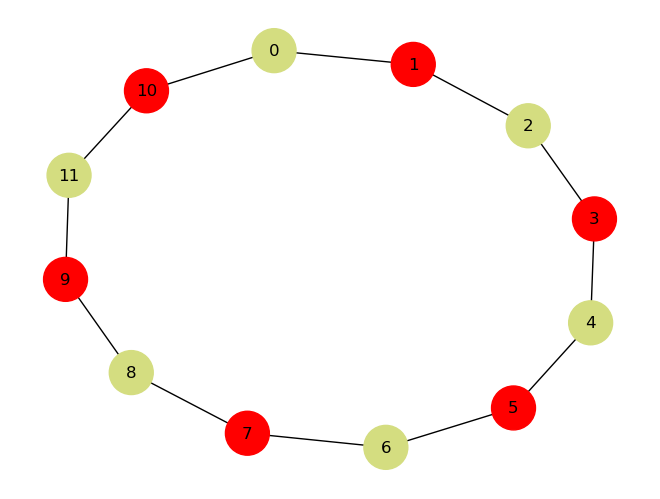

In [245]:
at.draw_network(target,X,with_labels=True,node_size=1000,edge_color='black')

In [247]:
with open('../data/classA.json','r') as f:
    classA = json.load(f)

In [251]:
# Get human proteins of class A
proteins_classA = classA['proteins']
prot_humanA = []
for prot in proteins_classA:
    if prot[1] == 'human':
        prot_humanA.append(prot[2])

In [262]:
human_cycles = []
human_cycles_depth = []
human_cycles_prob = []
for prot in prot_humanA:
    graph = graphs_list[prot]['graph']
    if graph.number_of_nodes() <= 3:
        continue
    try:
        stats = graphs_list[prot]['tree_stats']
    except:
        continue
    if stats[0] < 0:
        continue
    cycle_list = nx.cycle_basis(graph)
    # Get largest cycle
    if len(cycle_list) > 0:
        largest_cycle = max(cycle_list, key=len)
        human_cycles.append(len(largest_cycle))
        human_cycles_depth.append(stats[1])
        human_cycles_prob.append(stats[0])


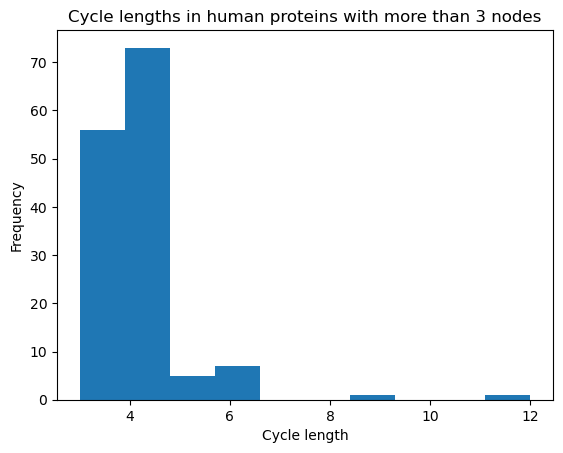

In [264]:
plt.hist(human_cycles)
plt.xlabel('Cycle length')
plt.ylabel('Frequency')
plt.title('Cycle lengths in human proteins with more than 3 nodes')
plt.show()

In [223]:
import json
with open(protein_human_path+'/treefiles/CPX-6143_tree.json', 'r') as f:
    tree_data = json.load(f)

In [122]:
tree_data[0]['0']['children'][0]['1']['data']

[0, 1, 2, 3, 4, 6, 8]

In [146]:
deep_large_graphs = {}
for name, graph in large_graphs.items():
    try:
        tree_stats = graph['tree_stats']
        if tree_stats[1] >= 2:
            deep_large_graphs[name] = graph
    except:
        continue

In [232]:
large_graphs.keys()

dict_keys(['CPX-10309', 'CPX-10333', 'CPX-116', 'CPX-131', 'CPX-137', 'CPX-143', 'CPX-152', 'CPX-168', 'CPX-17', 'CPX-1847', 'CPX-1878', 'CPX-1880', 'CPX-1910', 'CPX-1919', 'CPX-1941', 'CPX-1949', 'CPX-195', 'CPX-2000', 'CPX-2001', 'CPX-2002', 'CPX-2087', 'CPX-2097', 'CPX-2158', 'CPX-2159', 'CPX-2167', 'CPX-2175', 'CPX-2180', 'CPX-2194', 'CPX-2208', 'CPX-2229', 'CPX-2234', 'CPX-2236', 'CPX-2239', 'CPX-2250', 'CPX-2341', 'CPX-2363', 'CPX-2373', 'CPX-2387', 'CPX-2391', 'CPX-2393', 'CPX-2401', 'CPX-2419', 'CPX-2492', 'CPX-2499', 'CPX-2503', 'CPX-2505', 'CPX-2506', 'CPX-2513', 'CPX-2514', 'CPX-2537', 'CPX-2540', 'CPX-2544', 'CPX-2545', 'CPX-25716', 'CPX-25717', 'CPX-25720', 'CPX-25758', 'CPX-25766', 'CPX-26028', 'CPX-2612', 'CPX-262', 'CPX-2640', 'CPX-267', 'CPX-2698', 'CPX-2701', 'CPX-2707', 'CPX-271', 'CPX-2731', 'CPX-2769', 'CPX-2805', 'CPX-2811', 'CPX-2823', 'CPX-2832', 'CPX-2837', 'CPX-2840', 'CPX-2842', 'CPX-2847', 'CPX-285', 'CPX-286', 'CPX-2862', 'CPX-2877', 'CPX-2881', 'CPX-2882',

In [234]:
graphs_list['CPX-6143']

{'graph': <networkx.classes.graph.Graph at 0x3046e14e0>,
 'tree_stats': array([8.30000000e-01, 3.00000000e+00, 1.07890284e+03]),
 'X': array([[0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.]])}

In [225]:
tree_data[0]

{'0': {'children': [{'1': {'children': [{'7': {'children': [{'11': {'data': [1,
            8]}},
         {'12': {'data': [6]}}],
        'data': [1, 6, 8]}},
      {'8': {'data': [0, 3]}}],
     'data': [0, 1, 3, 6, 8]}},
   {'2': {'children': [{'9': {'data': [7, 10]}}, {'10': {'data': [4]}}],
     'data': [4, 7, 10]}},
   {'3': {'data': [9]}},
   {'4': {'data': [2]}},
   {'5': {'data': [11]}},
   {'6': {'data': [5]}}],
  'data': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}}

In [9]:
depths = []
for key in graphs_list.keys():
    try:
        if graphs_list[key]['tree_stats'][0] >= .95 and graphs_list[key]['graph'].number_of_nodes() > 3:
            depths.append(graphs_list[key]['tree_stats'][1])
    except:
        continue

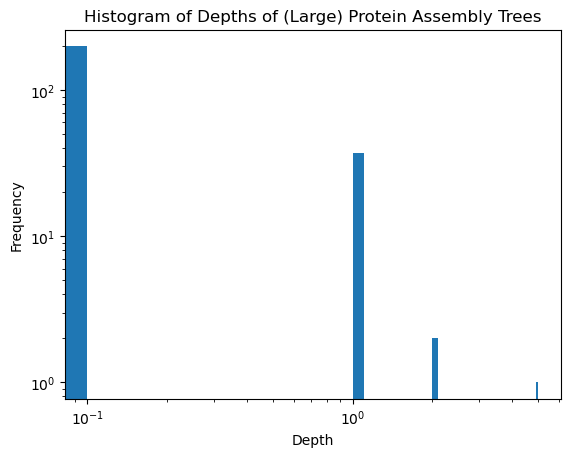

In [14]:
# Plot histogram of depths on log log scale logbined
plt.hist(depths, bins=50, log=True)
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.title('Histogram of Depths of (Large) Protein Assembly Trees')
plt.xscale('log')
plt.yscale('log')
# plt.xticks([.1,.2,.3,.4,.5,.6,.7,.8,.9,1,2,3,4,5,6],
#            [10**{-1}])
plt.show()

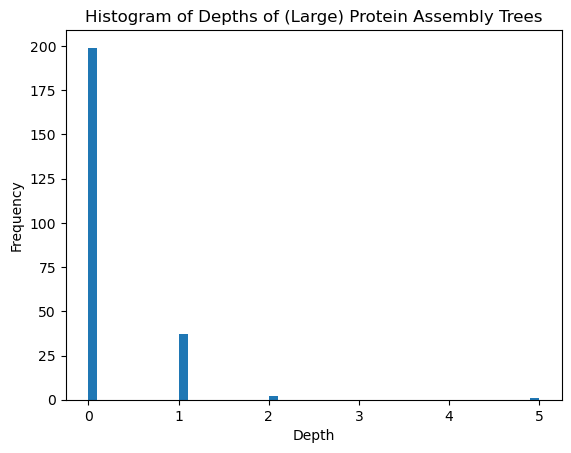

In [12]:
# Plot histogram of depths on linescale
plt.hist(depths, bins=50, log=False)
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.title('Histogram of Depths of (Large) Protein Assembly Trees')
plt.xscale('linear')
plt.yscale('linear')
plt.show()

In [15]:
molecule_path = '/Users/glover.co/Documents/laszlo/NetDesign/data/Molecules'
# edgefiles = sorted(os.listdir(molecule_path+'/edgefiles'))
treefiles = sorted(os.listdir(molecule_path+'/treefiles'))
# Xfiles = sorted(os.listdir(molecule_path+'/Xfiles'))

In [16]:
graphs_list = {}
for i,graph in enumerate(treefiles):
    basename = graph.split('t')[0][:-1]
    graphs_list[basename] = {}
    # graphs_list[basename]['graph'] = nx.read_edgelist(protein_human_path+'/edgefiles/'+graph, nodetype=int)
    try:
        graphs_list[basename]['tree_stats'] = np.loadtxt(molecule_path+'/treefiles/'+basename + '_tree_stats.txt', delimiter=',',skiprows=1)
    except:
        continue
    # graphs_list[basename]['X'] = np.loadtxt(protein_human_path+'/Xfiles/X_'+basename + '.txt',skiprows=0)



In [18]:
large_graphs = {}
for name, graph in graphs_list.items():
    if graph['graph'].number_of_nodes() > 3:
        large_graphs[name] = graph

KeyError: 'graph'

In [210]:
# Get depths of molecules
depths = []
for key in graphs_list.keys():
    try:
        if graphs_list[key]['tree_stats'][0] >= .95:
            depths.append(graphs_list[key]['tree_stats'][1])
    except:
        continue

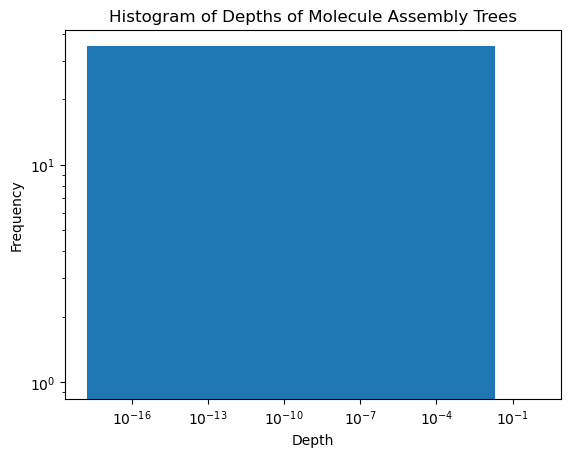

In [211]:
# Plot histogram of depths on log log scale
plt.hist(depths, bins=50, log=True)
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.title('Histogram of Depths of Molecule Assembly Trees')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [19]:
failed_examples = {}
for name, graph in graphs_list.items():
    try:
        tree_stats = graph['tree_stats']
        if tree_stats[0] < 1:
            failed_examples[name] = graph
    except:
        continue

In [20]:
failed_examples

{'CID_10026': {'tree_stats': array([-3.91202301,  2.        ])},
 'CID_10197702': {'tree_stats': array([  -3.91202301,    2.        , 1773.26559901])},
 'CID_4101': {'tree_stats': array([7.90000000e-01, 4.00000000e+00, 6.14381699e+03])},
 'CID_5453': {'tree_stats': array([4.80000000e-01, 3.00000000e+00, 2.21014113e+03])},
 'CID_76957057': {'tree_stats': array([8.40000000e-01, 1.00000000e+00, 1.01417738e+03])}}

In [21]:
import json
with open(molecule_path+'/treefiles/CID_4101_tree.json', 'r') as f:
    tree_data = json.load(f)

In [24]:
tree_data

[{'0': {'children': [{'1': {'children': [{'24': {'children': [{'140': {'data': [3,
             8,
             11]}},
          {'141': {'data': [19]}}],
         'data': [3, 8, 11, 19]}},
       {'25': {'children': [{'119': {'children': [{'121': {'data': [12, 17]}},
             {'122': {'data': [18]}}],
            'data': [12, 17, 18]}},
          {'120': {'data': [2]}}],
         'data': [2, 12, 17, 18]}}],
      'data': [2, 3, 8, 11, 12, 17, 18, 19]}},
    {'2': {'children': [{'59': {'children': [{'152': {'data': [7, 13]}},
          {'153': {'data': [15]}}],
         'data': [7, 13, 15]}},
       {'60': {'children': [{'150': {'data': [14, 21]}},
          {'151': {'data': [5]}}],
         'data': [5, 14, 21]}},
       {'61': {'data': [6, 10]}}],
      'data': [5, 6, 7, 10, 13, 14, 15, 21]}},
    {'3': {'children': [{'148': {'data': [1, 4]}}, {'149': {'data': [0, 9]}}],
      'data': [0, 1, 4, 9]}},
    {'4': {'data': [16, 20]}}],
   'data': [0,
    1,
    2,
    3,
    4,
    5,

In [38]:
target = nx.read_edgelist(molecule_path+'/CID_4101.txt', nodetype=int)
X = np.loadtxt(molecule_path+'/X_4101.txt', skiprows=0)

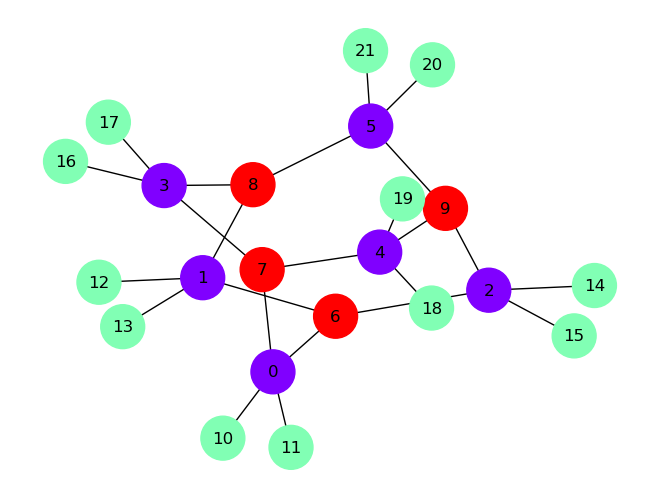

In [49]:
at.draw_network(target, X, with_labels=True, node_size=1000)

Text(0, 0.5, 'Cycle Length')

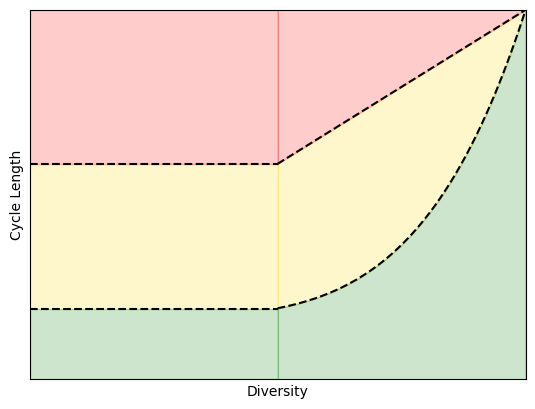

In [126]:
plt.hlines(.5,0,.5,linestyles='--',color='k')
plt.hlines(.03,0,.5,linestyles='--',color='k')
plt.xlim(0,1)
plt.ylim(-.2,1)
plt.plot(np.linspace(.5,1,100),np.linspace(.5,1,100)**(5),color='k',linestyle='--')
plt.plot(np.linspace(.5,1,100),np.linspace(.5,1,100),color='k',linestyle='--')
plt.fill_between(np.linspace(.5,1,100), np.linspace(.5,1,100)**(5), np.linspace(.5,1,100), color='gold', alpha=.2)
plt.fill_between(np.linspace(0,.5,100), .03*np.ones(100), .5*np.ones(100), color='gold', alpha=.2)
plt.fill_between(np.linspace(0,.5,100),-.2*np.ones(100),.03*np.ones(100), color='green', alpha=.2)
plt.fill_between(np.linspace(.5,1,100),-.2*np.ones(100),np.linspace(.5,1,100)**(5), color='green', alpha=.2)
plt.fill_between(np.linspace(0,.5,100), .5*np.ones(100), np.linspace(1,1,100), color='red', alpha=.2)
plt.fill_between(np.linspace(.5,1,100), np.linspace(.5,1,100),np.linspace(1,1,100), color='red', alpha=.2)
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel('Diversity')
plt.ylabel('Cycle Length')

In [53]:
plt.hlines?

Signature:
plt.hlines(
    y: 'float | ArrayLike',
    xmin: 'float | ArrayLike',
    xmax: 'float | ArrayLike',
    colors: 'ColorType | Sequence[ColorType] | None' = None,
    linestyles: 'LineStyleType' = 'solid',
    *,
    label: 'str' = '',
    data=None,
    **kwargs,
) -> 'LineCollection'
Docstring:
Plot horizontal lines at each *y* from *xmin* to *xmax*.

Parameters
----------
y : float or array-like
    y-indexes where to plot the lines.

xmin, xmax : float or array-like
    Respective beginning and end of each line. If scalars are
    provided, all lines will have the same length.

colors : :mpltype:`color` or list of color , default: :rc:`lines.color`

linestyles : {'solid', 'dashed', 'dashdot', 'dotted'}, default: 'solid'

label : str, default: ''

Returns
-------
`~matplotlib.collections.LineCollection`

Other Parameters
----------------
data : indexable object, optional
    If given, the following parameters also accept a string ``s``, which is
    interpreted as ``data[

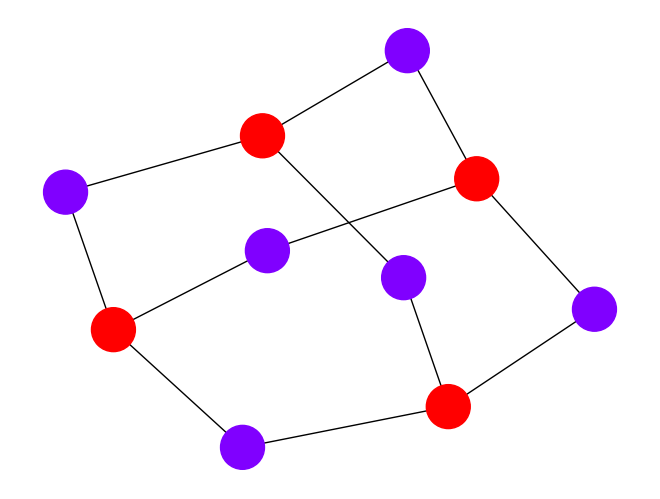

In [143]:
at.draw_network(nx.subgraph(target,np.arange(0,10)),X,with_labels=False,node_size=1000,edge_color='black')

In [134]:
initial_graph = nx.Graph()
initial_graph.add_nodes_from(np.arange(0,10))
initial_graph.add_edges_from([(0,6),(0,7),(9,2),(9,4),(1,8),(1,3)])

In [138]:
g = at.microcanonical_ensemble(X,O,capacity,initial_graph=initial_graph,max_edges=True)

In [136]:
O = at.extract_O(target, X)

In [137]:
capacity = at.extract_deg_cap(target, X).reshape(-1)

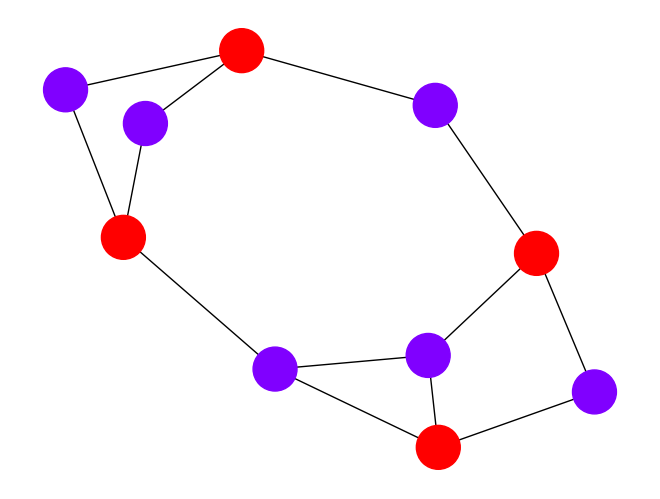

In [140]:
at.draw_network(g,X,with_labels=False,node_size=1000,edge_color='black')

In [144]:
with open('../data/SAnames.txt','r') as f:
    SANames = f.read().splitlines()

In [147]:
SANames = [x.split(',') for x in SANames]

In [155]:
for i in SANames:
    try:
        print(i[2],graphs_list[i[2]]['tree_stats'][0])
    except:
        continue

CPX-10309 1.0
CPX-116 1.0
CPX-131 1.0
CPX-137 1.0
CPX-143 1.0
CPX-168 1.0
CPX-17 1.0
CPX-1847 1.0
CPX-1878 1.0
CPX-1910 1.0
CPX-1941 1.0
CPX-195 1.0
CPX-2000 1.0
CPX-2001 1.0
CPX-2002 1.0
CPX-2087 1.0
CPX-2097 1.0
CPX-2159 1.0
CPX-2167 1.0
CPX-2180 1.0
CPX-2194 1.0
CPX-2208 1.0
CPX-2229 1.0
CPX-2234 1.0
CPX-2239 1.0
CPX-2250 1.0
CPX-2341 1.0
CPX-2401 1.0
CPX-2492 1.0
CPX-2499 1.0
CPX-2505 1.0
CPX-2506 1.0
CPX-2513 1.0
CPX-2514 1.0
CPX-2540 1.0
CPX-2545 1.0
CPX-25716 1.0
CPX-25720 1.0
CPX-25758 1.0
CPX-25766 1.0
CPX-2612 1.0
CPX-262 1.0
CPX-2640 0.95
CPX-2698 1.0
CPX-2701 1.0
CPX-271 1.0
CPX-2731 1.0
CPX-2769 1.0
CPX-2805 1.0
CPX-2811 1.0
CPX-2832 1.0
CPX-2837 1.0
CPX-2840 1.0
CPX-2842 1.0
CPX-2847 1.0
CPX-285 1.0
CPX-286 1.0
CPX-2862 1.0
CPX-2881 1.0
CPX-2882 1.0
CPX-2884 1.0
CPX-2885 1.0
CPX-2886 1.0
CPX-2887 1.0
CPX-289 1.0
CPX-2891 1.0
CPX-2897 1.0
CPX-2936 1.0
CPX-2940 1.0
CPX-2954 1.0
CPX-3032 1.0
CPX-3033 1.0
CPX-3058 1.0
CPX-3094 1.0
CPX-3095 1.0
CPX-3239 1.0
CPX-3256 1.0
CPX-32

In [3]:
X = np.array([[1],[1],[1],[1],[1],[1]])
O = np.array([[2]])
capacity = np.array([[2]])
initial_graph = nx.Graph()
initial_graph.add_nodes_from(np.arange(0,6))
initial_graph.add_edges_from([(0,1),(2,3),(4,5)])

In [4]:
g = at.microcanonical_ensemble(X, O, capacity, initial_graph=initial_graph, max_edges=True)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [8]:
target = nx.read_edgelist(protein_human_path+'/edgefiles/CPX-1919.edge', nodetype=int)

In [10]:
X = np.loadtxt(protein_human_path+'/Xfiles/X_CPX-1919.txt')

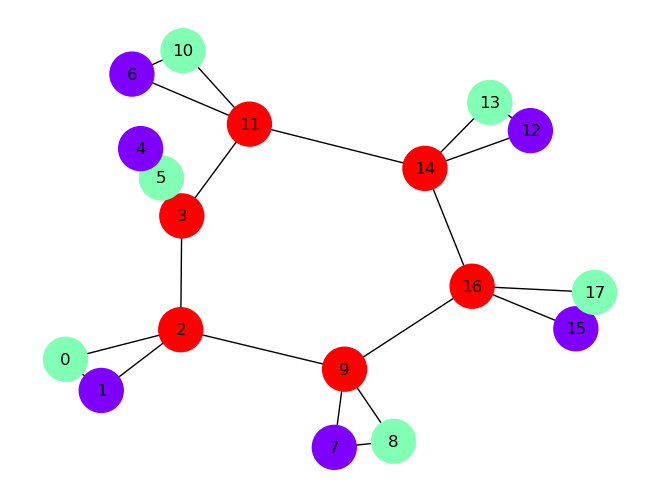

In [11]:
at.draw_network(target,X,with_labels=True,node_size=1000,edge_color='black')

In [12]:
A = nx.adjacency_matrix(target).todense()

In [160]:
pos_edges = np.triu(np.ones_like(A),k=1)
pos_edges.sum()
capacity_constraints = np.zeros((A.shape[0],pos_edges.sum()))
O_constraints = np.zeros((O.shape[0]*A.shape[0],pos_edges.sum()))

In [163]:
idx_i, idx_j = np.triu_indices(A.shape[0],k=1,m=A.shape[1])
for i in range(A.shape[0]):
    for j in range(len(idx_i)):
        if idx_i[j] == i or idx_j[j] == i:
            capacity_constraints[i,j] = 1
            for k in range(O.shape[0]):
                if idx_i[j] == i:
                    O_constraints[i*O.shape[0]+k,j] = X[idx_j[j],k]
                else:
                    O_constraints[i*O.shape[0]+k,j] = X[idx_i[j],k]

array([0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [150]:
X

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [164]:
constraint_mat = np.vstack([capacity_constraints, O_constraints])

In [168]:
constraint_mat[24].sum()

np.float64(6.0)

In [27]:
constraints

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [169]:
O = at.extract_O(target, X)

In [170]:
capacity = at.extract_deg_cap(target, X).reshape(-1)

In [171]:
b_u = np.hstack((X@capacity,(X@O).flatten()))
b_l = np.zeros_like(b_u)

In [172]:
from scipy.optimize import LinearConstraint
constraints = LinearConstraint(constraint_mat, b_l, b_u)

In [173]:
c = -np.ones(pos_edges.sum())

In [174]:
integrality = np.ones_like(c)

In [175]:
from scipy.optimize import milp
res = milp(c=c, constraints=constraints, integrality=integrality, bounds=(0,1),options={'disp':True})

Running HiGHS 1.8.0 (git hash: unknown): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 1e+00]
  Cost   [1e+00, 1e+00]
  Bound  [1e+00, 1e+00]
  RHS    [1e+00, 4e+00]
Presolving model
60 rows, 123 cols, 492 nonzeros  0s
60 rows, 123 cols, 492 nonzeros  0s
Objective function is integral with scale 1

Solving MIP model with:
   60 rows
   123 cols (123 binary, 0 integer, 0 implied int., 0 continuous)
   492 nonzeros

Src: B => Branching; C => Central rounding; F => Feasibility pump; H => Heuristic; L => Sub-MIP;
     P => Empty MIP; R => Randomized rounding; S => Solve LP; T => Evaluate node; U => Unbounded;
     z => Trivial zero; l => Trivial lower; u => Trivial upper; p => Trivial point

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
Src  Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

 z       0       0

In [245]:
def find_optimal_edge_count(X,O,capacity,initial_graph=None,solution = True,disp=False,ret_edges=False):
    """
    Using linear programming, find the optimal number of edges in a microcanonical ensemble graph
    given the node features X, the edge features O, and the capacity constraints.

    Parameters
    ----------
    X (ndarray): Label matrix
    O (ndarray): Binding matrix
    capacity (ndarray): Capacity vector
    initial_graph (networkx.Graph, optional): Initial graph to start the optimization from.
    solution (bool): If True, return the solution vector, otherwise return the number of edges.
    disp (bool): If True, display the optimization process.
    ret_edges (bool): If True, return the edges of the optimal graph.

    Returns
    -------
    int or ndarray: The optimal number of edges in the microcanonical ensemble graph.
    """
    # Get number of nodes and possible edges
    

    if initial_graph is None:
        initial_graph = nx.Graph()
        initial_graph.add_nodes_from(N)
        N = X.shape[0]    
    nodes = list(initial_graph.nodes())
    N = len(nodes)
    pos_edges = N*(N-1) // 2


    # Create the constraint matrix
    capacity_constraints = np.zeros((N,pos_edges))
    O_constraints = np.zeros((O.shape[0]*N,pos_edges))
    idx_i, idx_j = np.triu_indices(N,k=1,m=N)
    for i in range(N):
        for j in range(len(idx_i)):
            if idx_i[j] == i or idx_j[j] == i:
                capacity_constraints[i,j] = 1
                for k in range(O.shape[0]):
                    if idx_i[j] == i:
                        O_constraints[i*O.shape[0]+k,j] = X[nodes[idx_j[j]],k]
                    else:
                        O_constraints[i*O.shape[0]+k,j] = X[nodes[idx_i[j]],k]
    constraint_mat = np.vstack([capacity_constraints, O_constraints])
    # Remove constraints that refer to existing edges
    edges = np.array(list(initial_graph.edges()))
    edges_idx = []
    for e1, e2 in edges:
        # Get index of nodes in node list
        idx_e1 = nodes.index(e1)
        idx_e2 = nodes.index(e2)
        # Find (e1,e2) in idx_i and idx_j
        edges_idx.append(int(np.where((idx_i == idx_e1) & (idx_j == idx_e2))[0][0]))
    # Remove columns associated with existing edges
    constraint_mat = np.delete(constraint_mat, edges_idx, axis=1)
    # Create the bounds
    A = nx.adjacency_matrix(initial_graph).todense()
    deg = initial_graph.degree()
    b_u = np.hstack((X[nodes,:]@capacity - np.array([deg[i] for i in nodes]),(X[nodes,:]@O - A@X[nodes,:]).flatten()))
    b_l = np.zeros_like(b_u)
    # Create the solution coefficients
    c = -np.ones(pos_edges - len(edges_idx))
    integrality = np.ones_like(c)
    # Create the linear constraint
    constraints = LinearConstraint(constraint_mat, b_l, b_u)
    # Solve the linear programming problem
    res = milp(c=c, constraints=constraints, integrality=integrality, bounds=(0,1), options={'disp':disp})
    if res.success:
        if solution:
            if ret_edges:
                added_edges = []
                for i in range(len(nodes)):
                    for j in range(i+1, len(nodes)):
                        added_edges.append((nodes[i], nodes[j]))
                added_edges = np.array([e for e in added_edges if e not in initial_graph.edges()])
                return res.x, added_edges[res.x.astype(int) == 1,:]
            return res.x
        else:
            if ret_edges:
                added_edges = []
                for i in range(len(nodes)):
                    for j in range(i+1, len(nodes)):
                        added_edges.append((nodes[i], nodes[j]))
                added_edges = np.array([e for e in added_edges if e not in initial_graph.edges()])
                return -int(res.fun), added_edges[res.x.astype(int) == 1,:]
            return -int(res.fun)
    else:
        raise ValueError("Linear programming failed to find a solution.")

    
    

In [246]:
initial_graph = nx.Graph()
initial_graph.add_nodes_from([1,9,13,16,8,6])
initial_graph.add_edges_from([[1,9],[1,13],[9,13],[9,16],[6,8]])
A_flat,edges = find_optimal_edge_count(X,O,capacity,solution=True,disp=False,initial_graph=initial_graph,ret_edges=True)
print(edges)

[[16  8]
 [16  6]]


In [236]:
A_flat.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [177]:
new_g = nx.from_numpy_array(opt_A + opt_A.T)

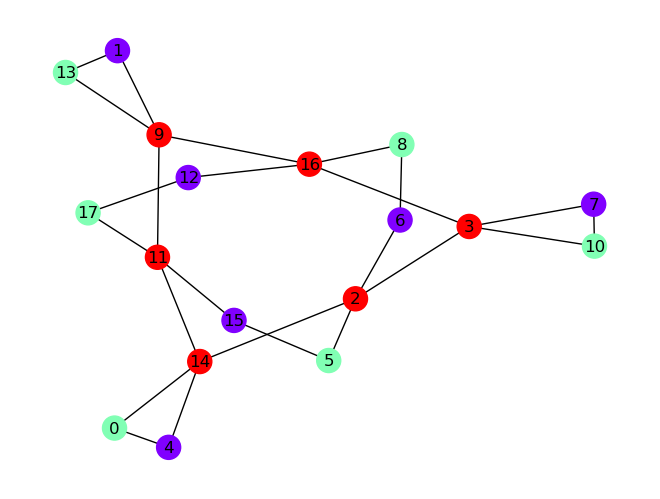

In [178]:
at.draw_network(new_g, X, with_labels=True, edge_color='black')

In [201]:
A@X[[1,13,9,16],:]

array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.],
       [0., 0., 1.]])

In [203]:
X[[1,13,9,16],:]@O - A@X[[1,13,9,16],:]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [1., 1., 1.]])

In [205]:
X[[1,13,9,16],:]@capacity - np.array(new_g.degree())[:,1]

array([0., 0., 1., 3.])

In [209]:
[dict(new_g.degree())[i] for i in [1,3,2,0]]

[2, 1, 3, 2]